In [1]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from numpy import pi

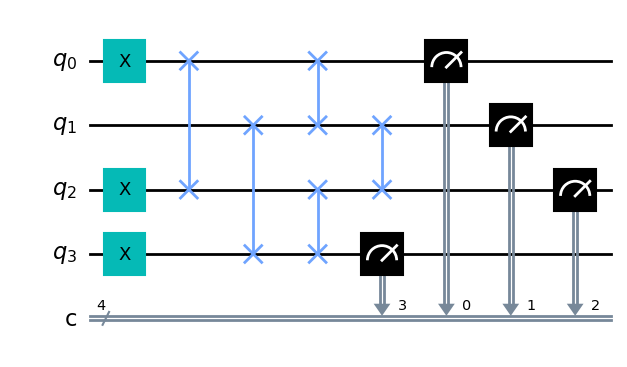

In [3]:
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# Quantum register for input data
# Classical register to store measurement result
# Input data to be sorted (4 qubits, 1101 in binary)
circuit.x(qreg_q[0])
circuit.x(qreg_q[2])
circuit.x(qreg_q[3])
# Sorting operation using swap network
circuit.swap(qreg_q[0], qreg_q[2])
circuit.swap(qreg_q[1], qreg_q[3])
circuit.swap(qreg_q[0], qreg_q[1])
circuit.swap(qreg_q[2], qreg_q[3])
circuit.swap(qreg_q[1], qreg_q[2])
# Measure the sorted result
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[3], creg_c[3])

#print the circuit 
circuit.draw('mpl')

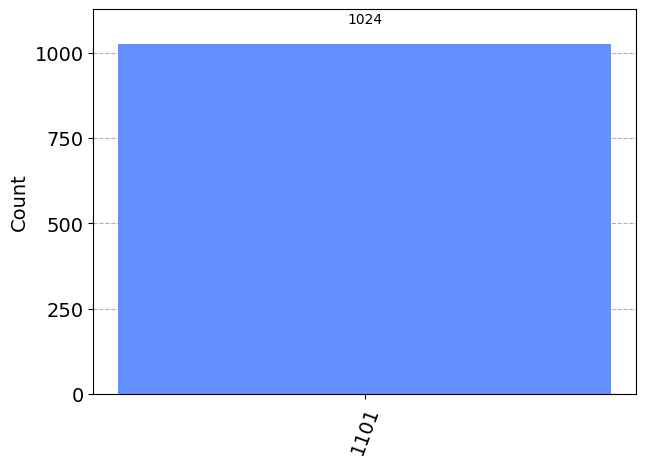

In [4]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
backend=AerSimulator()
job=backend.run(circuit)
result=job.result()
count=result.get_counts(circuit)
plot_histogram(count)